# 남이 만든 CNN! (pretrained CNN)

## 쉽지만 중요한 코너!

이미 **'잘 만들어진'** 모델들을 가져다가 사용해보자.

[이 링크를 참고해보자](https://keras.io/applications/)


---

### 라이브러리 로딩

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions

from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt

## 인셉션 모델 바로 가져오기!

[이 코드](https://github.com/fchollet/deep-learning-models/blob/master/inception_v3.py)를 참고하는 것도 도움이 된다!




In [ ]:
model = InceptionV3(weights='imagenet', # 이미지넷 데이터 바탕으로 미리 학습된 것
                    include_top=True,   # 마지막 레이어까지 전부
                    input_shape= (299,299,3))

96112376/96112376 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

엇, 마지막 prediction 레이어를 보면 노드가 1000개!

분류 가능한 이미지가 1000개라는 뜻!

[구경하러 가자](http://image-net.org/challenges/LSVRC/2014/browse-synsets)

### 내 그림 파일을 업로드 해둔 곳으로 가자!

**경로에 대하여**
1. my_data 폴더를 **본인의** 구글 드라이브에 바로 만들어둔다.
2. my_data 폴더 안에 img1 폴더를 만든다.
3. 구글링하여 이미지 파일들을 수집하고 img1 이라는 폴더안에 업로드한다.
4. 5초 정도 여유를 갖자.
5. 아래 코드들을 실행한다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/my_data

/content/drive/MyDrive/my_data


In [ ]:
ls

cat-7498364_960_720.jpg                 gray-cat-7828134_960_720.jpg
cat-7840767_960_720.jpg                 img1/
chick-7711698_960_720.jpg               squirrel-7816229_960_720.jpg
chickens-7763394_960_720.webp           swan-7606921_960_720.webp
cinereous-vulture-7811766_960_720.webp  zebra-7757193_960_720.jpg


In [ ]:
mkdir /content/drive/MyDrive/qew/img1/

In [ ]:
ls

cat-7498364_960_720.jpg                 gray-cat-7828134_960_720.jpg
cat-7840767_960_720.jpg                 img1/
chick-7711698_960_720.jpg               squirrel-7816229_960_720.jpg
chickens-7763394_960_720.webp           swan-7606921_960_720.webp
cinereous-vulture-7811766_960_720.webp  zebra-7757193_960_720.jpg


### 이미지를 불러와보자

In [ ]:
import glob

In [ ]:
files = glob.glob('/content/drive/MyDrive/my_data/img1/*')

preprocess 전, 최대값: 245.0, 최소값: 0.0
preprocess 후, 최대값: 0.9215686321258545, 최소값: -1.0
35363/35363 [==============================] - 0s 0us/step
[[('n02009912', 'American_egret', 0.22829852), ('n01860187', 'black_swan', 0.17279449), ('n01855672', 'goose', 0.10779787)]]


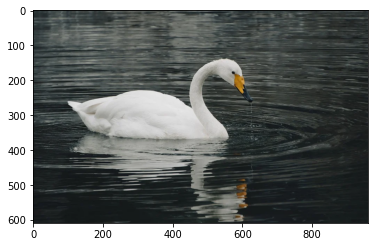

In [ ]:
img = image.load_img(files[-1], color_mode='rgb', target_size = (299,299) )
img = image.img_to_array(img)
img = img.reshape((-1,299,299,3))
print(f'preprocess 전, 최대값: {np.max(img)}, 최소값: {np.min(img)}')

img = preprocess_input(img)
print(f'preprocess 후, 최대값: {np.max(img)}, 최소값: {np.min(img)}')

features = model.predict(img)
print(decode_predictions(features, top=3))

plt.imshow(image.load_img(files[-1]))
plt.show()

### 이미지가 여러 장이라면

In [ ]:
images = []

for path in files :
    img = image.load_img(path, grayscale = False, target_size = (299,299) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)
    
images = np.array(images)    

1/1 [==============================] - 2s 2s/step
[('n01514859', 'hen', 0.48719725), ('n01807496', 'partridge', 0.093406275), ('n02017213', 'European_gallinule', 0.07008459)]


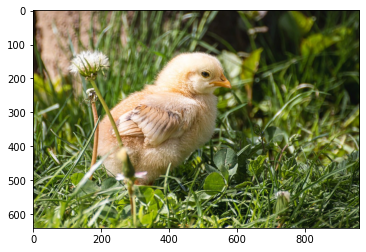

[('n02123159', 'tiger_cat', 0.58747756), ('n02124075', 'Egyptian_cat', 0.1677089), ('n02123045', 'tabby', 0.10384657)]


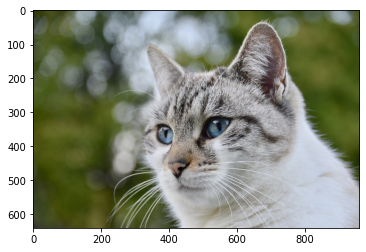

[('n02123045', 'tabby', 0.40353662), ('n02124075', 'Egyptian_cat', 0.23915035), ('n02123159', 'tiger_cat', 0.23676303)]


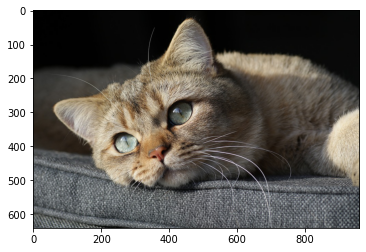

[('n02356798', 'fox_squirrel', 0.88322407), ('n02361337', 'marmot', 0.00445447), ('n02326432', 'hare', 0.0022619364)]


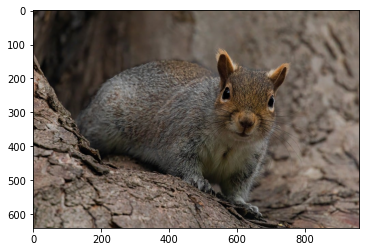

[('n01514859', 'hen', 0.06851835), ('n04462240', 'toyshop', 0.062432583), ('n02093647', 'Bedlington_terrier', 0.051453006)]


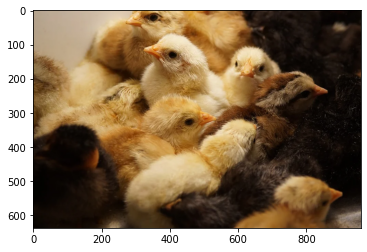

[('n02123159', 'tiger_cat', 0.65623814), ('n02123045', 'tabby', 0.14136499), ('n02127052', 'lynx', 0.08361871)]


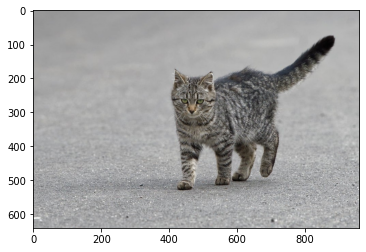

[('n01616318', 'vulture', 0.872769), ('n01582220', 'magpie', 0.009415887), ('n01608432', 'kite', 0.006392297)]


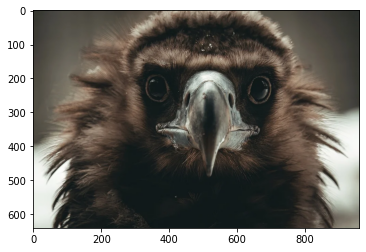

[('n02391049', 'zebra', 0.94632107), ('n01518878', 'ostrich', 0.0008103492), ('n02422106', 'hartebeest', 0.0006396143)]


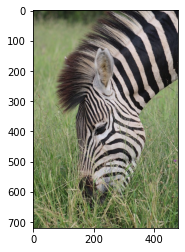

[('n02009912', 'American_egret', 0.22826877), ('n01860187', 'black_swan', 0.1728126), ('n01855672', 'goose', 0.10779764)]


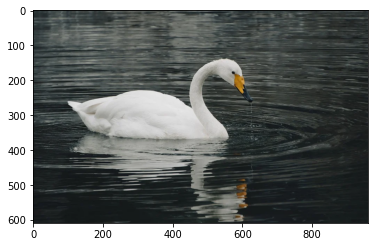

In [ ]:
features = model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()

## 매우매우 너무너무 중요한 Exercise!

* 강아지로 한다. (싫으면 다른거 하나 정하자.)
* 잘 되는 강아지 이미지 10 개 찾아보자.
* 안 되는 강아지 이미지 10 개 찾아보자.
---
- 경로 설정
    - my_data 폴더 안에 img2를 만들고 수집한 이미지를 넣으세요.

In [ ]:
import glob

In [ ]:
files = glob.glob('/content/drive/MyDrive/my_data/img2/*')
files

['/content/drive/MyDrive/my_data/img2/다운로드 (1).jpg',
 '/content/drive/MyDrive/my_data/img2/다운로드 (4).jpg',
 '/content/drive/MyDrive/my_data/img2/다운로드 (2).jpg',
 '/content/drive/MyDrive/my_data/img2/다운로드.jpg',
 '/content/drive/MyDrive/my_data/img2/다운로드 (3).jpg',
 '/content/drive/MyDrive/my_data/img2/images.png']

In [ ]:
images = []

for path in files:
  img = image.load_img(path, grayscale=False, target_size=(299,299))
  img = image.img_to_array(img)
  img = preprocess_input(img)
  images.append(img)

images = np.array(images)

1/1 [==============================] - 1s 1s/step
[('n01616318', 'vulture', 0.6685747), ('n02002724', 'black_stork', 0.056811284), ('n01608432', 'kite', 0.02881138)]


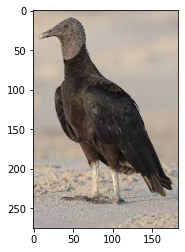

[('n01798484', 'prairie_chicken', 0.41186246), ('n01616318', 'vulture', 0.2805788), ('n01807496', 'partridge', 0.04679735)]


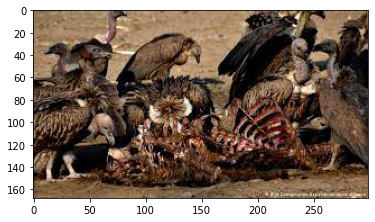

[('n01616318', 'vulture', 0.78175426), ('n01819313', 'sulphur-crested_cockatoo', 0.012189298), ('n01608432', 'kite', 0.0070476066)]


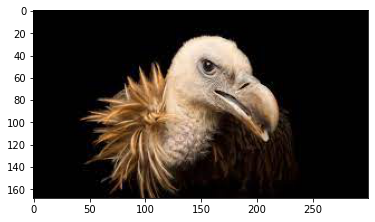

[('n01616318', 'vulture', 0.93522245), ('n01608432', 'kite', 0.0069179176), ('n02002724', 'black_stork', 0.0038507006)]


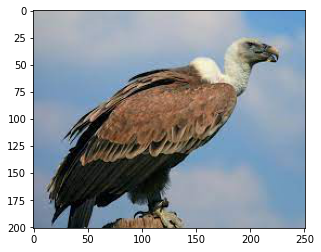

[('n01616318', 'vulture', 0.9972916), ('n01608432', 'kite', 0.0013718195), ('n03777754', 'modem', 0.00049197656)]


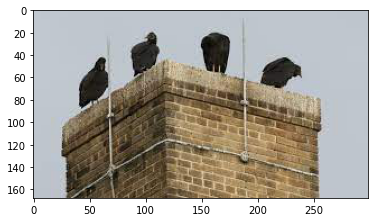

[('n01675722', 'banded_gecko', 0.22045572), ('n06596364', 'comic_book', 0.1188677), ('n02879718', 'bow', 0.062971234)]


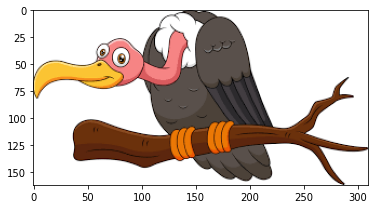

In [ ]:
features = model.predict(images)

predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]):
  print(predictions[i])
  plt.imshow(image.load_img(files[i]))
  plt.show()